### Spring 2018, CCNY
### BIGDATA Final Project
### Prof: HUY VO
### Student: Mohamed Sondo, Rupesh Basnet

 function to download turnstile data from the MTA website.

In [1]:
import pandas as pd

def importMTAData(startMonthInt, endMonthInt):
    df =[]
    for m in range(startMonthInt,endMonthInt):
        for d in range(1,31):
            url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_16' + ('%02d') % (m,) + ('%02d') % (d,) + '.txt' 
            print('Trying to Reading :'+ ' '+ url)
            try:
                tempDF = pd.read_csv(url)
                print('Success!!!')
                if len(df) < 1:
                    df = tempDF 
                else:
                    df = pd.concat([df,tempDF])
            except Exception:
                pass
    return(df)
                

#df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170401.txt')

df = importMTAData(3,5)

Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160301.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160302.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160303.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160304.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160305.txt
Success!!!
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160306.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160307.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160308.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160309.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstile/turnstile_160310.txt
Trying to Reading : http://web.mta.info/developers/data/nyct/turnstil

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns


%pylab inline

Populating the interactive namespace from numpy and matplotlib


Stations such as 34th street Penn Station could have multiple lines. Concatenate station and line information

In [4]:
df['STATION'] = df['STATION'] + "_"+ df['LINENAME']

Take a look at dates in data to ensure we have good data

In [5]:
df.DATE.unique()

array(['02/27/2016', '02/28/2016', '02/29/2016', '03/01/2016',
       '03/02/2016', '03/03/2016', '03/04/2016', '03/05/2016',
       '03/06/2016', '03/07/2016', '03/08/2016', '03/09/2016',
       '03/10/2016', '03/11/2016', '03/12/2016', '03/13/2016',
       '03/14/2016', '03/15/2016', '03/16/2016', '03/17/2016',
       '03/18/2016', '03/19/2016', '03/20/2016', '03/21/2016',
       '03/22/2016', '03/23/2016', '03/24/2016', '03/25/2016',
       '03/26/2016', '03/27/2016', '03/28/2016', '03/29/2016',
       '03/30/2016', '03/31/2016', '04/01/2016', '04/02/2016',
       '04/03/2016', '04/04/2016', '04/05/2016', '04/06/2016',
       '04/07/2016', '04/08/2016', '04/09/2016', '04/10/2016',
       '04/11/2016', '04/12/2016', '04/13/2016', '04/14/2016',
       '04/15/2016', '04/16/2016', '04/17/2016', '04/18/2016',
       '04/19/2016', '04/20/2016', '04/21/2016', '04/22/2016',
       '04/23/2016', '04/24/2016', '04/25/2016', '04/26/2016',
       '04/27/2016', '04/28/2016', '04/29/2016'], dtype

Look at the first few rows

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST_NQR456,NQR456,BMT,02/27/2016,03:00:00,REGULAR,5562172,1877574
1,A002,R051,02-00-00,59 ST_NQR456,NQR456,BMT,02/27/2016,07:00:00,REGULAR,5562184,1877586
2,A002,R051,02-00-00,59 ST_NQR456,NQR456,BMT,02/27/2016,11:00:00,REGULAR,5562267,1877691
3,A002,R051,02-00-00,59 ST_NQR456,NQR456,BMT,02/27/2016,15:00:00,REGULAR,5562516,1877745
4,A002,R051,02-00-00,59 ST_NQR456,NQR456,BMT,02/27/2016,19:00:00,REGULAR,5562920,1877821


Looks like column names have spaces, which could end up being annoying with intellisense. Strip spaces from column names

In [7]:
df.columns = [i.strip() for i in df.columns]

In [8]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

Combine date and time columns and create new DateTime column

In [9]:
# add format to make things faster here
df['dateTime'] = pd.to_datetime(df.DATE +' '+ df.TIME, format='%m/%d/%Y %H:%M:%S')

Entries and exits columns in the data show the register value at the given time for a given turnstile. The first approach show below was to group data by date for each turnstile and subtract min from max for entries and exits. However, this didn't work properly due to outliers in data. In some cases registers were being reset, possibly due to repairs.

In [10]:
key = ['C/A',
'UNIT',
'SCP',
'STATION',
 'DATE']

#df['Incr_ENTRIES'] = df.groupby(key).ENTRIES.apply(lambda x: x.order(ascending=True)).diff()
#df['Incr_EXITS'] = df.groupby(key).EXITS.diff()
entries = df.groupby(key).ENTRIES.agg(['min','max']).reset_index()
entries.rename(columns={'min':'entries_min','max':'entries_max'}, inplace=True)

entries['NoEntries'] = entries['entries_max'] - entries['entries_min']
entries.set_index(key, inplace=True)

exits = df.groupby(key).EXITS.agg(['min','max']).reset_index()
exits.rename(columns={'min':'exits_min','max':'exits_max'}, inplace=True)
exits['NoExits'] = exits['exits_max'] - exits['exits_min']
exits.set_index(key, inplace=True)

combined = entries.join(exits).reset_index()
combined['totalFootTraffic'] = combined.NoEntries + combined.NoExits

key = ['C/A',
'UNIT',
'SCP',
 'DATE']

combined.groupby('STATION').totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False)

combined.describe()

,entries_min,entries_max,NoEntries,exits_min,exits_max,NoExits,totalFootTraffic
count,2.884370e+05,2.884370e+05,2.884370e+05,2.884370e+05,2.884370e+05,2.884370e+05,2.884370e+05
mean,3.450347e+07,3.453679e+07,3.332168e+04,2.816239e+07,2.819305e+07,3.066019e+04,6.398188e+04
std,1.928012e+08,1.929062e+08,6.502540e+06,1.738662e+08,1.739767e+08,6.325837e+06,1.191555e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.635420e+05,5.646470e+05,2.530000e+02,2.855740e+05,2.869470e+05,1.290000e+02,5.610000e+02
50%,2.520128e+06,2.522857e+06,7.950000e+02,1.473497e+06,1.474835e+06,4.670000e+02,1.466000e+03
75%,6.397638e+06,6.400210e+06,1.550000e+03,4.588790e+06,4.590922e+06,1.066000e+03,2.660000e+03
max,2.146697e+09,2.146697e+09,2.130766e+09,2.097169e+09,2.097170e+09,2.097170e+09,4.227935e+09


Looks like there are outliers. It doesn't make sense 18 Av, 57st and Lorimer St stations show up as top stations for turnstile traffic. Let's dig in to find out what is going on here

In [11]:
combined.sort_values('NoEntries', ascending=False).head()

,C/A,UNIT,SCP,STATION,DATE,entries_min,entries_max,NoEntries,exits_min,exits_max,NoExits,totalFootTraffic
52335,J005,R353,00-00-01,LORIMER ST_JM,04/06/2016,368,2130765931,2130765563,134,2097169768,2097169634,4227935197
239234,R305,R206,01-00-02,125 ST_23,04/05/2016,9174608,1946145648,1936971040,5894601,1493213618,1487319017,3424290057
150054,N539A,R288,00-05-01,7 AV_FG,04/27/2016,6839231,1744880879,1738041648,915950,218111622,217195672,1955237320
201554,R174,R034,00-00-00,125 ST_1,04/05/2016,2546283,637542801,634996518,1253787,318773563,317519776,952516294
115355,N312,R339,00-06-00,36 ST_MR,04/15/2016,16843032,302092160,285249128,2304,5071,2767,285251895


In [12]:
combined[(combined['STATION']=='LORIMER ST') & (combined.DATE == '03/26/2017')].sort_values('NoEntries')

,C/A,UNIT,SCP,STATION,DATE,entries_min,entries_max,NoEntries,exits_min,exits_max,NoExits,totalFootTraffic


Here is an example of a turnstile at Lorimer Street that jumped ahead by order of magnitudes

In [13]:
df[(df.STATION=='LORIMER ST') & 
   (df.DATE == '04/06/2016') & 
   (df.UNIT =='R353') &
   (df.SCP == '00-00-01')].sort_values('dateTime')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,dateTime


### Second Approach: ###

Group by and then calculate diffs between entries/exits to get incremental entries/exits

In [14]:
key = ['C/A',
'UNIT',
'SCP',
'STATION']

def calcDiff(df):
    df = df.sort_values('dateTime')
    df['Incr_ENTRIES'] =  df.ENTRIES - df.ENTRIES.shift(1)
    df['Incr_EXITS'] = df.EXITS - df.EXITS.shift(1)
    return(df)


newDF = df.groupby(key, as_index=False).apply(lambda x: calcDiff(x)).reset_index()

Rename new columns

In [15]:
newDF = newDF[list(df.columns.values) + ['Incr_ENTRIES', 'Incr_EXITS']]

### Control for outliers ###

In [16]:
newDF.DESC.value_counts()

REGULAR       1739748
RECOVR AUD       6009
Name: DESC, dtype: int64

Removing audit entries

In [17]:
newDF = newDF[newDF.DESC != 'RECOVR AUD']

remove outlier by kicking out all negative incr_ENTRIES and incr_EXITS

In [18]:
newDF = newDF.loc[(newDF['Incr_ENTRIES']>0) & (newDF['Incr_EXITS']>0),]

In [19]:
newDF['Incr_ENTRIES'].describe()

count    1.422986e+06
mean     6.539056e+03
std      3.238798e+06
min      1.000000e+00
25%      3.500000e+01
50%      1.250000e+02
75%      3.080000e+02
max      2.122355e+09
Name: Incr_ENTRIES, dtype: float64

In [20]:
newDF['totalFootTraffic'] = newDF['Incr_ENTRIES'] + newDF['Incr_EXITS']

In [41]:
key = ['C/A',
'UNIT',
'SCP',
'STATION']

newDF.groupby(['STATION']).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).head(20)
#newDF.groupby(key, as_index=False).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).reset_index()
#newDF.groupby(key, as_index=False).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).reset_index()

,sum
STATION,
57 ST,3.459017e+09
18 AV,3.404523e+09
59 ST,2.722977e+09
MORISN AV/SNDVW,1.554872e+09
LORIMER ST,1.003559e+09
86 ST,1.759065e+08
28 ST,1.382835e+08
47-50 STS ROCK,1.022195e+08
TIMES SQ-42 ST,9.368863e+07


In [21]:
newDF.Incr_ENTRIES.describe()

count    1.422986e+06
mean     6.539056e+03
std      3.238798e+06
min      1.000000e+00
25%      3.500000e+01
50%      1.250000e+02
75%      3.080000e+02
max      2.122355e+09
Name: Incr_ENTRIES, dtype: float64

Removing rows where the change between two adjacent lines is too large

In [22]:
newDF = newDF.loc[(newDF.Incr_ENTRIES < 20000) & (newDF.Incr_EXITS < 20000),]

In [23]:
newDF.Incr_ENTRIES.describe()

count    1.422942e+06
mean     2.251518e+02
std      2.854805e+02
min      1.000000e+00
25%      3.500000e+01
50%      1.240000e+02
75%      3.080000e+02
max      1.921400e+04
Name: Incr_ENTRIES, dtype: float64

In [24]:
newDF[(newDF.STATION =='34 ST-PENN STA')].totalFootTraffic.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: totalFootTraffic, dtype: float64

Now it looks better

In [30]:
newDF.groupby(['STATION']).totalFootTraffic.agg(['sum']).sort_values('sum', ascending=False).head(10)

,sum
STATION,
GRD CNTRL-42 ST_4567S,14630696.0
34 ST-HERALD SQ_BDFMNQR,12488532.0
TIMES SQ-42 ST_1237ACENQRS,8774352.0
34 ST-PENN STA_ACE,8405658.0
14 ST-UNION SQ_LNQR456,7658915.0
42 ST-PORT AUTH_ACENQRS1237,7430509.0
86 ST_456,6677214.0
47-50 STS ROCK_BDFM,6280452.0
FLUSHING-MAIN_7,6051475.0


**For clean data use newDF from this point on**

Top 10 busiest station

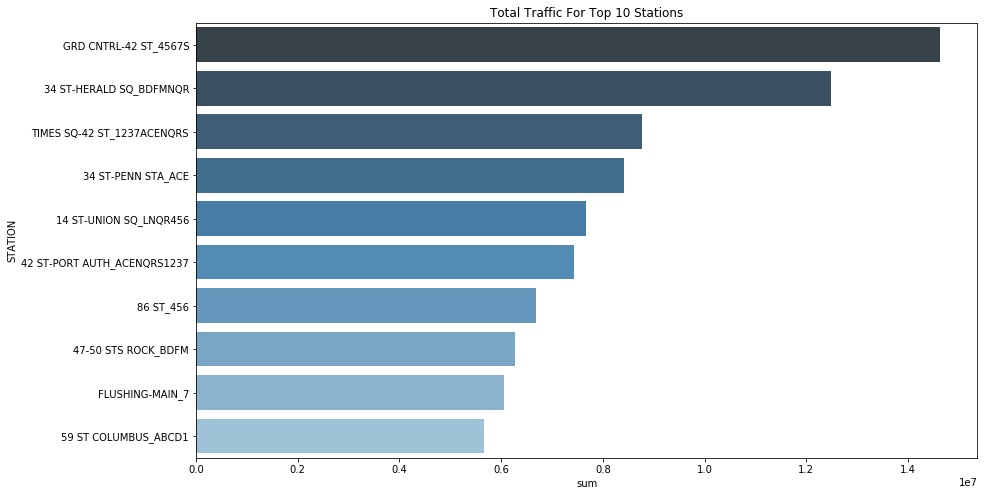

In [31]:
plt.figure(figsize=(14, 8))
plt.title("Total Traffic For Top 10 Stations")
graph1DF = newDF.groupby(['STATION']).totalFootTraffic.agg(['sum']).reset_index()
graph1DF = graph1DF.nlargest(10,'sum')
sns.barplot(x="sum", y="STATION", orient = "h", data=graph1DF, palette = "Blues_d")
plt.savefig('10TopStations.png', dpi = 1000)

In [32]:
newDF['dayOfWeek'] = newDF.dateTime.dt.weekday_name

In [33]:
newDF['IsWeekday'] = False
newDF.loc[(newDF.dayOfWeek != 'Sunday') & (newDF.dayOfWeek != 'Saturday'),'IsWeekday'] = True

Avg. Entries for Top 10 Stations

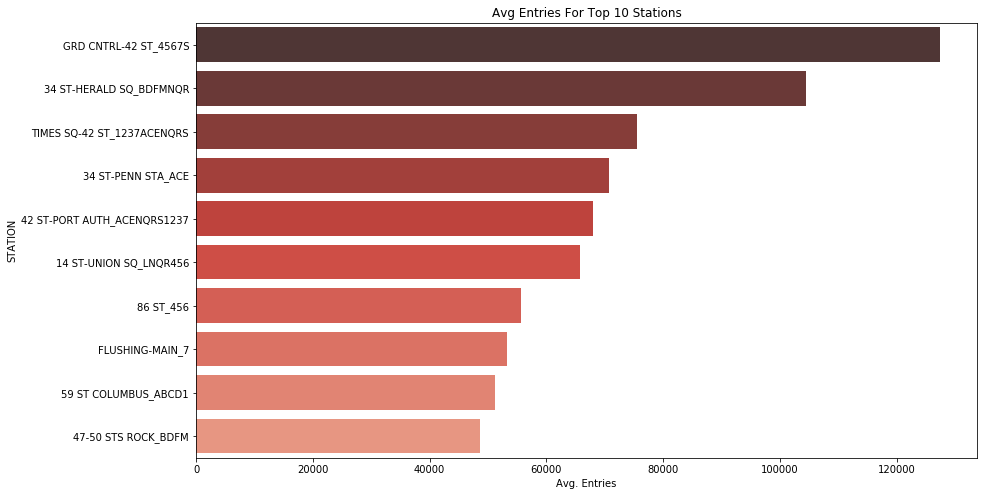

In [34]:
#Avg Entries For Top 10 Stations
entriesByStDt = newDF.groupby(['STATION','DATE','dayOfWeek']).Incr_ENTRIES.sum().reset_index()

top10St = entriesByStDt.groupby('STATION').Incr_ENTRIES.sum().reset_index().nlargest(10,'Incr_ENTRIES')[['STATION']]

entriesTop10St = top10St.merge(entriesByStDt, on='STATION')

plt.figure(figsize=(14, 8))
plt.title("Avg Entries For Top 10 Stations")
ax = sns.barplot(x="Incr_ENTRIES", y="STATION", orient = "h", data=entriesTop10St, ci=None, palette = "Reds_d")
ax.set(xlabel='Avg. Entries', ylabel='STATION')

plt.savefig('AverageEntriesForTop10Stations.png', dpi=1000)

Generate map with 10 top busiest stations mapped

In [35]:
from bokeh.io import output_file, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)

In [36]:
map_options = GMapOptions(lat=40.70, lng=-73.85, map_type="roadmap", zoom=11)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options
)

In [37]:
%matplotlib inline
plot.api_key = "bokeh api key here"


### grnd central, penn, 34th herald square, 23 st, 14stunion sq, times sq 42, 42nd st port, fulton, 86th st, 125th st
source = ColumnDataSource(
    data=dict(
        lat=[40.751849, 40.749533, 40.752247, 40.757303, 40.734836, 40.755905, 40.709938, 40.758652, 40.76811, 40.759578],
        lon=[-73.976945, -73.987899, -73.993456, -73.989787, -73.990688, -73.986504, -74.007983, -73.981311, -73.981891,-73.830056],
    )
)

circle = Circle(x="lon", y="lat", size=8, fill_color="red", fill_alpha=0.6, line_color=None)
plot.add_glyph(source, circle)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
output_file("gmap_plot.html")
show(plot)

In [38]:
newDF['hour'] = newDF.dateTime.dt.hour

In [39]:
key = ['C/A',
'UNIT',
'SCP',
'STATION',
'DATE']

newDF['interval'] = newDF.groupby(key).hour.apply(lambda x: pd.cut(x,[0,4,8,12,16,20,24]))

#newDF.TIME.value_counts().head(15)
compactedByTimeInterval = newDF.groupby(['C/A',
'UNIT',
'SCP',
'STATION',
'DATE',
'interval']).Incr_ENTRIES.sum().reset_index()

compactedByTimeInterval['dayOfWeek'] = pd.to_datetime(compactedByTimeInterval.DATE).dt.weekday_name

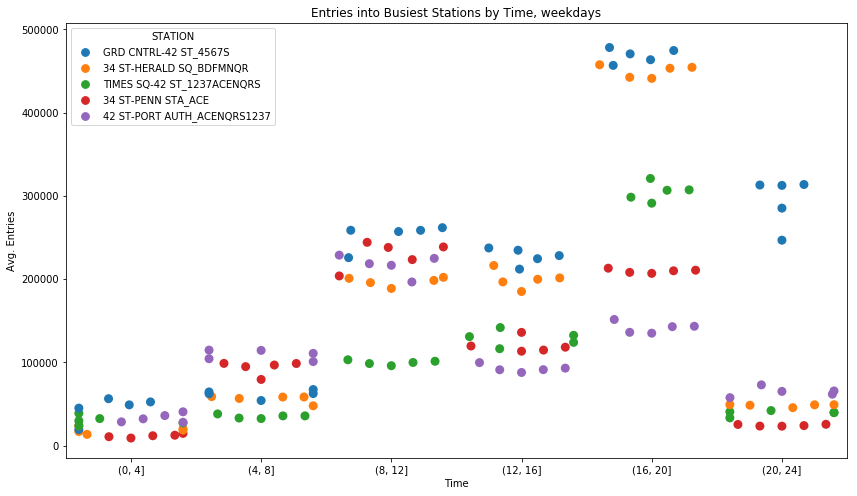

In [40]:
t = (compactedByTimeInterval[(compactedByTimeInterval.dayOfWeek != 'Sunday') & (compactedByTimeInterval.dayOfWeek != 'Saturday')]
 .groupby(['STATION', 'DATE','dayOfWeek', 'interval'])
 .Incr_ENTRIES.sum()
 .reset_index()
 .merge(top10St, on='STATION', how='right')
 .groupby(['STATION','dayOfWeek','interval'])
 .Incr_ENTRIES.sum()
 .reset_index()
)
t2 = top10St.head(5).merge(t, on='STATION')

fig = plt.figure()
ax = sns.swarmplot(x="interval", y="Incr_ENTRIES", hue='STATION', data=t2,size=9);
ax.set_title('Entries into Busiest Stations by Time, weekdays')
ax.set_ylabel('Avg. Entries')
ax.set_xlabel('Time')
fig.set_size_inches(14,8)
fig.savefig('entriesIntoBusiestStations.png',dpi=1000)

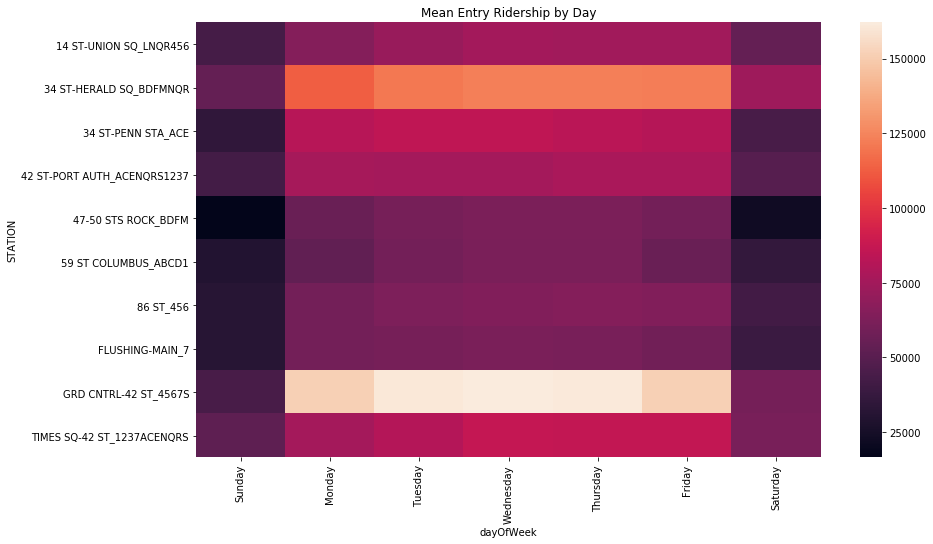

In [41]:
top10 = list(newDF.groupby(['STATION']).Incr_ENTRIES.agg(['sum']).sort_values('sum', ascending=False).head(10).reset_index()['STATION'])
tDF = newDF.groupby([
'STATION',
 'DATE','dayOfWeek']).Incr_ENTRIES.agg("sum").reset_index()

tDF2 = tDF[tDF.STATION.isin(top10)]
tDF3 = tDF2.groupby(["STATION", "dayOfWeek"]).Incr_ENTRIES.mean().reset_index()
tDF3
tDF4 = tDF3.pivot("STATION", "dayOfWeek", "Incr_ENTRIES")
tDF4 = tDF4[["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]]
fig = plt.figure()
sns.heatmap(tDF4)
plt.xticks(rotation="vertical")
plt.title("Mean Entry Ridership by Day")
fig.set_size_inches(14,8)
fig.savefig("MeanEntriesbyDay.png",dpi=1000)